# Classifying Urban sounds using Deep Learning
**By:**
- Shaikha Bin Ateeq 
- Alanoud Alosaimi 
- Raghad Althanyan 

### OverView  :

Following on from the previous notebook, we identifed the following audio properties that need preprocessing to ensure consistency across the whole dataset:
- Audio Channels
- Sample rate
- Bit-depth

also We use Mel-Frequency Cepstral Coefficients(MFCC) and extract it from audio samples.now lets move on to split and Build our model 

**Import Libraries:**

In [172]:
import keras
import pickle
import numpy as np
import pandas as pd
from sklearn import metrics 
import matplotlib.pyplot as plt
from keras.utils import np_utils
from sklearn.utils import shuffle
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
#from keras.layers import Convolution2D, MaxPooling2D
#from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,Activation
#from keras.layers import Dense, Dropout, Activation, Flatten
from sklearn.metrics import classification_report,confusion_matrix 
from keras.layers import Dense, Embedding, LSTM, Input, Flatten, Dropout, Activation, Conv1D, Conv2D,MaxPooling1D, AveragePooling1D, GlobalAveragePooling2D

In [241]:
with open('Df_Final.pickle','rb') as read_file:
    df5 = pickle.load(read_file)
    
df5.head(5)

,MFCC,class_name
0,"[[-1.0, -1.0, -0.6859621, -0.4066782, -0.27337...",dog_bark
1,"[[-1.0, -0.92530745, -0.8827135, -0.83456916, ...",children_playing
2,"[[-0.5573074, -0.52561057, -0.62860227, -0.678...",children_playing
3,"[[-0.9489181, -0.8168003, -0.7987346, -0.78233...",children_playing
4,"[[-0.21790166, -0.15364559, -0.22467631, -0.20...",children_playing


In [242]:
df5.shape

(10903, 2)

In [243]:
df5 = shuffle(df5)

In [245]:
option=['Scissors','Bus','Computer_keyboard']

In [246]:
df5 = df5[~df5.class_name.isin(option)]

In [180]:
print(df5.class_name.value_counts())

street_music        1000
children_playing    1000
jackhammer          1000
dog_bark            1000
air_conditioner     1000
engine_idling       1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Applause             300
Fireworks            300
Tearing              300
Laughter             300
Cough                243
Microwave_oven       146
Keys_jangling        139
Telephone            120
Name: class_name, dtype: int64


In [181]:
df5=df5.groupby('class_name',as_index = False,group_keys=False).apply(lambda s: s.sample(120,replace=True))

In [248]:
df5=df5.reset_index(drop=True)

In [250]:
df5 = df5.rename(columns={'MFCC': 'MFCC_Padded'})

In [251]:
df5

,MFCC_Padded,class_name
0,"[[-0.24786279, -0.24490526, -0.27155763, -0.30...",street_music
1,"[[0.24621098, 0.31810847, 0.3041705, 0.0594650...",air_conditioner
2,"[[0.6048181, 0.33277223, -0.098323286, -0.3606...",jackhammer
3,"[[-0.87349004, -0.78541213, -0.87545437, -0.90...",children_playing
4,"[[-0.66386485, -0.39963248, -0.54435503, -1.0,...",jackhammer
...,...,...
10575,"[[-0.56632936, -0.60961926, -0.6482681, -0.632...",siren
10576,"[[-0.6008589, -0.49897188, -0.49449846, -0.513...",engine_idling
10577,"[[-0.18406941, -0.18236142, -0.25557747, -0.13...",car_horn
10578,"[[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -0...",children_playing


In [252]:
check5 = df5['MFCC_Padded']
check5

0        [[-0.24786279, -0.24490526, -0.27155763, -0.30...
1        [[0.24621098, 0.31810847, 0.3041705, 0.0594650...
2        [[0.6048181, 0.33277223, -0.098323286, -0.3606...
3        [[-0.87349004, -0.78541213, -0.87545437, -0.90...
4        [[-0.66386485, -0.39963248, -0.54435503, -1.0,...
                               ...                        
10575    [[-0.56632936, -0.60961926, -0.6482681, -0.632...
10576    [[-0.6008589, -0.49897188, -0.49449846, -0.513...
10577    [[-0.18406941, -0.18236142, -0.25557747, -0.13...
10578    [[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -0...
10579    [[0.23915121, 0.31070983, 0.2881079, 0.2574947...
Name: MFCC_Padded, Length: 10580, dtype: object

In [187]:
import pickle
with open('Df_Final2.pickle', 'wb') as to_write:
    pickle.dump(df5, to_write)

In [253]:
df5 = shuffle(df5)

In [254]:
# Convert features and corresponding classification labels into numpy arrays
X = np.array(df5.MFCC_Padded.tolist())
y = np.array(df5.class_name.tolist())

In [255]:
X.shape

(10580, 40, 174)

In [256]:
y.shape

(10580,)

In [257]:
#y.head()
aa = pd.DataFrame(y)
aa

,0
0,siren
1,street_music
2,drilling
3,car_horn
4,engine_idling
...,...
10575,engine_idling
10576,children_playing
10577,engine_idling
10578,air_conditioner


In [258]:
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y))

In [259]:
yy

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [260]:
num_labels = 18
num_labels

18

### Split the dataset:

In [261]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 42)
X_train , X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=.25, random_state= 42)

In [262]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape, X_test.shape, y_test.shape

((6348, 40, 174),
 (2116, 40, 174),
 (6348, 18),
 (2116, 18),
 (2116, 40, 174),
 (2116, 18))

In [264]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [265]:
#reshaping to shape required by CNN
X_train2=np.reshape(X_train,(X_train.shape[0], 40,174,1))
X_val2=np.reshape(X_val,(X_val.shape[0], 40,174,1))
X_test2=np.reshape(X_test,(X_test.shape[0], 40,174,1))

In [266]:
X_train2.shape, X_val2.shape, y_train.shape, y_val.shape

((6348, 40, 174, 1), (2116, 40, 174, 1), (6348, 18), (2116, 18))

In [271]:
input_shape=X_train2.shape[1:]


# Experiment 1:

In [43]:
from tensorflow.keras.layers import InputLayer, BatchNormalization, MaxPooling2D
from keras.callbacks import ModelCheckpoint 
from tensorflow.keras.callbacks import EarlyStopping
from datetime import datetime 

In [44]:
model = Sequential()

input_shape=X_train2.shape[1:]

model.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(128,kernel_size=5,strides=1,padding="same",activation="relu"))
model.add(MaxPooling2D(padding="same"))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(256,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(512,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(units = num_labels, activation="softmax"))

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 40, 174, 64)       1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 20, 87, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 87, 128)       204928    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 44, 128)      0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 10, 44, 128)       0         
                                                                 
 flatten (Flatten)           (None, 56320)             0

In [46]:
model.compile(loss = 'categorical_crossentropy', 
              metrics = ['accuracy'],
              optimizer = 'adam')

In [47]:
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 25, verbose= 1, mode='auto')

checkpointer = ModelCheckpoint(filepath='weights3.best.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()


model.fit(X_train2, y_train,
          batch_size = 300, 
          epochs = 300,
          validation_data = (X_val2, y_val), 
          callbacks=[checkpointer, es])

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/300
9/9 [==============================] - ETA: 0s - loss: 2.8458 - accuracy: 0.1028
Epoch 00001: val_loss improved from inf to 2.55411, saving model to weights3.best.hdf5
9/9 [==============================] - 67s 7s/step - loss: 2.8458 - accuracy: 0.1028 - val_loss: 2.5541 - val_accuracy: 0.1345
Epoch 2/300
9/9 [==============================] - ETA: 0s - loss: 2.4930 - accuracy: 0.1873
Epoch 00002: val_loss improved from 2.55411 to 2.33189, saving model to weights3.best.hdf5
9/9 [==============================] - 65s 7s/step - loss: 2.4930 - accuracy: 0.1873 - val_loss: 2.3319 - val_accuracy: 0.2131
Epoch 3/300
9/9 [==============================] - ETA: 0s - loss: 2.2436 - accuracy: 0.2675
Epoch 00003: val_loss improved from 2.33189 to 2.08715, saving model to weights3.best.hdf5
9/9 [==============================] - 74s 8s/step - loss: 2.2436 - accuracy: 0.2675 - val_loss: 2.0872 - val_accuracy: 0.3238
Epoch 4/300
9/9 [==============================] - ETA: 0s - loss: 2.04

Epoch 30/300
9/9 [==============================] - ETA: 0s - loss: 0.5719 - accuracy: 0.7782
Epoch 00030: val_loss did not improve from 1.68456
9/9 [==============================] - 62s 7s/step - loss: 0.5719 - accuracy: 0.7782 - val_loss: 2.1938 - val_accuracy: 0.5345
Epoch 31/300
9/9 [==============================] - ETA: 0s - loss: 0.5763 - accuracy: 0.7869
Epoch 00031: val_loss did not improve from 1.68456
9/9 [==============================] - 61s 7s/step - loss: 0.5763 - accuracy: 0.7869 - val_loss: 2.1265 - val_accuracy: 0.5512
Epoch 32/300
9/9 [==============================] - ETA: 0s - loss: 0.5542 - accuracy: 0.7988
Epoch 00032: val_loss did not improve from 1.68456
9/9 [==============================] - 58s 6s/step - loss: 0.5542 - accuracy: 0.7988 - val_loss: 2.2218 - val_accuracy: 0.5274
Epoch 33/300
9/9 [==============================] - ETA: 0s - loss: 0.5651 - accuracy: 0.7893
Epoch 00033: val_loss did not improve from 1.68456
9/9 [==============================] - 

Text(0.5, 1.0, 'Training-Validation Accuracy')

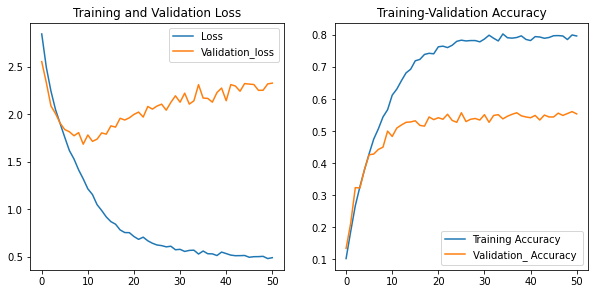

In [49]:
#saving the model history
loss = pd.DataFrame(model.history.history)


#plotting the loss and accuracy 
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(loss["loss"], label ="Loss")
plt.plot(loss["val_loss"], label = "Validation_loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(2,2,2)
plt.plot(loss['accuracy'],label = "Training Accuracy")
plt.plot(loss['val_accuracy'], label ="Validation_ Accuracy ")
plt.legend()
plt.title("Training-Validation Accuracy")

In [50]:
prediction = model.predict(X_val2)

# finding class with larget predicted probability using argmax of numpy 
y_pred = np.argmax(prediction, axis = 1)  # prediction using model 
y_val_orig = np.argmax(y_val, axis = 1) # original y_val
print(y_pred)


[20  5 13 17 18 10 11 16 18 20 16  1 16  3 10  5  0 18 20 11 11  2  0 15
 12  1  9  4 19  5  5 16  2 17 15 11 10  4  0  7  1 16 10  7 19 13  5 13
  5 16  7  8  8 12  8  9 19  7 18  2  3 20 11  8 15  0 11 12  0  4  5  1
  3 18  7 18  7  6  9 15 10 17  5 15 10 18  2 14 10 11  4 19 11 19  1 12
  9  2 11  9 14  6 16  5 20 19  2  1 19  4  5  4 20 10 16  3 15 18  5 10
 11 16 16 11 12 10 16  5  7 13 17 19 14 10  0  3 10  2  8  6  3  6  6 19
  3  3 16 13  2  5  8  8 18  8 14 17 20 12 18 19 18 16 20  8  8  5 20  8
  8  3 20 12  4 18  6  6  5 20 18 16  1 15 17  5 19 14 15 18  1  3  8 13
 11  4  7 12  3  6 20 13 17  2 20 14 12  5  3  3 12  8  6  1 12 10 15  1
 17 14  4 18 18  3 11 18 17  6 12 10  2 12 18  3 20  5 13  8 10 15  6 16
 16  6  3 17 18 13 19 19 15 17 15 12 18 15 13  1 20  6 19 16  5 19 19  5
  2 13  5  2 13 10 16  0 14 16  5  7 18  6  5  2 20  4  6 20  8 15 11  3
 16  1 18 11  8 13  6 16  2 16 14  8 19  2 16  6 15  6 14 16 11  8  8  8
  1  5 20  7  5 14  6 11 12 16 20  1  4 17  2 19  7

In [51]:
print(classification_report(y_val_orig, y_pred))

              precision    recall  f1-score   support

           0       0.10      0.04      0.06        45
           1       0.56      0.45      0.50        44
           2       0.36      0.47      0.41        40
           3       0.30      0.34      0.32        38
           4       0.29      0.24      0.26        42
           5       0.25      0.45      0.32        29
           6       0.24      0.24      0.24        37
           7       0.48      0.33      0.39        45
           8       0.25      0.54      0.34        28
           9       0.50      0.29      0.37        52
          10       0.33      0.35      0.34        37
          11       0.68      0.82      0.75        34
          12       0.91      0.97      0.94        33
          13       0.61      0.54      0.58        35
          14       0.78      0.63      0.70        49
          15       0.86      0.67      0.76        46
          16       0.90      0.85      0.88        54
          17       0.94    

# Experiment 2:

In [64]:
model2 = Sequential()


model2.add(Conv2D(128, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
model2.add(MaxPooling2D(padding="same"))

model2.add(Conv2D(128,kernel_size=5,strides=1,padding="same",activation="relu"))
model2.add(MaxPooling2D(padding="same"))
model2.add(Dropout(0.5))

model2.add(Flatten())

model2.add(Dense(512,activation="relu"))
model2.add(Dropout(0.5))

model2.add(Dense(512,activation="relu"))
model2.add(Dropout(0.5))


model2.add(Dense(512,activation="relu"))
model2.add(Dropout(0.5))


model2.add(Dense(units = num_labels, activation="softmax"))

In [65]:
model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 40, 174, 128)      3328      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 20, 87, 128)      0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 20, 87, 128)       409728    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 10, 44, 128)      0         
 2D)                                                             
                                                                 
 dropout_11 (Dropout)        (None, 10, 44, 128)       0         
                                                                 
 flatten_3 (Flatten)         (None, 56320)            

In [66]:
model2.compile(loss = 'categorical_crossentropy', 
              metrics = ['accuracy'],
              optimizer = 'adam')

In [69]:
ess = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 25, verbose= 1, mode='auto')

checkpointer = ModelCheckpoint(filepath='weights4.best.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()


model2.fit(X_train2, y_train,
          batch_size = 300, 
          epochs = 300,
          validation_data = (X_val2, y_val), 
          callbacks=[checkpointer, ess])

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/300
9/9 [==============================] - ETA: 0s - loss: 2.7756 - accuracy: 0.1198 
Epoch 00001: val_loss improved from inf to 2.63168, saving model to weights4.best.hdf5
9/9 [==============================] - 120s 13s/step - loss: 2.7756 - accuracy: 0.1198 - val_loss: 2.6317 - val_accuracy: 0.1869
Epoch 2/300
9/9 [==============================] - ETA: 0s - loss: 2.6487 - accuracy: 0.1389 
Epoch 00002: val_loss improved from 2.63168 to 2.46612, saving model to weights4.best.hdf5
9/9 [==============================] - 120s 13s/step - loss: 2.6487 - accuracy: 0.1389 - val_loss: 2.4661 - val_accuracy: 0.2060
Epoch 3/300
9/9 [==============================] - ETA: 0s - loss: 2.5071 - accuracy: 0.1575 
Epoch 00003: val_loss improved from 2.46612 to 2.31954, saving model to weights4.best.hdf5
9/9 [==============================] - 117s 13s/step - loss: 2.5071 - accuracy: 0.1575 - val_loss: 2.3195 - val_accuracy: 0.2131
Epoch 4/300
9/9 [==============================] - ETA: 0s - l

Epoch 29/300
9/9 [==============================] - ETA: 0s - loss: 0.8853 - accuracy: 0.7079 
Epoch 00029: val_loss did not improve from 1.67937
9/9 [==============================] - 119s 13s/step - loss: 0.8853 - accuracy: 0.7079 - val_loss: 1.8639 - val_accuracy: 0.5310
Epoch 30/300
9/9 [==============================] - ETA: 0s - loss: 0.8736 - accuracy: 0.7317 
Epoch 00030: val_loss did not improve from 1.67937
9/9 [==============================] - 118s 13s/step - loss: 0.8736 - accuracy: 0.7317 - val_loss: 1.8507 - val_accuracy: 0.5440
Epoch 31/300
9/9 [==============================] - ETA: 0s - loss: 0.8508 - accuracy: 0.7238 
Epoch 00031: val_loss did not improve from 1.67937
9/9 [==============================] - 117s 13s/step - loss: 0.8508 - accuracy: 0.7238 - val_loss: 1.8489 - val_accuracy: 0.5464
Epoch 32/300
9/9 [==============================] - ETA: 0s - loss: 0.8397 - accuracy: 0.7194 
Epoch 00032: val_loss did not improve from 1.67937
9/9 [========================

Epoch 59/300
9/9 [==============================] - ETA: 0s - loss: 0.6045 - accuracy: 0.7853 
Epoch 00059: val_loss did not improve from 1.67937
9/9 [==============================] - 114s 13s/step - loss: 0.6045 - accuracy: 0.7853 - val_loss: 2.1427 - val_accuracy: 0.5476
Epoch 60/300
9/9 [==============================] - ETA: 0s - loss: 0.6003 - accuracy: 0.7861 
Epoch 00060: val_loss did not improve from 1.67937
9/9 [==============================] - 116s 13s/step - loss: 0.6003 - accuracy: 0.7861 - val_loss: 2.1551 - val_accuracy: 0.5560
Epoch 61/300
9/9 [==============================] - ETA: 0s - loss: 0.5873 - accuracy: 0.7881 
Epoch 00061: val_loss did not improve from 1.67937
9/9 [==============================] - 120s 13s/step - loss: 0.5873 - accuracy: 0.7881 - val_loss: 2.2042 - val_accuracy: 0.5405
Epoch 00061: early stopping
Training completed in time:  3:19:11.086896


Text(0.5, 1.0, 'Training-Validation Accuracy')

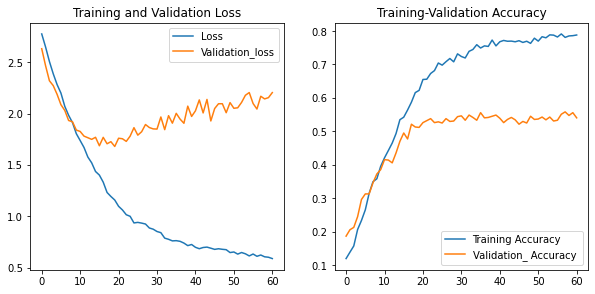

In [70]:
#saving the model history
loss = pd.DataFrame(model2.history.history)


#plotting the loss and accuracy 
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(loss["loss"], label ="Loss")
plt.plot(loss["val_loss"], label = "Validation_loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(2,2,2)
plt.plot(loss['accuracy'],label = "Training Accuracy")
plt.plot(loss['val_accuracy'], label ="Validation_ Accuracy ")
plt.legend()
plt.title("Training-Validation Accuracy")

In [71]:
prediction = model2.predict(X_val2)

# finding class with larget predicted probability using argmax of numpy 
y_pred = np.argmax(prediction, axis = 1)  # prediction using model 
y_val_orig = np.argmax(y_val, axis = 1) # original y_val
print(y_pred)

[20  5  7 17 18  3 11 11 18 20 16  9 16  3 10  5  0  4 13 11 11  2  5 15
 12  7  9  4 19  5  5 16  2 17 15 15 10  4  0  7  1 16 10  7 19 16  5 11
  5 16  3  8  5 12 14  9 19  7 16  1  3 20 11  8 15  0 11 12  0 10  5  1
  3 18  3 11  7  6  9 15 10 17  5 15 10 18  2  6 10 11  6 19 11 19  1 12
  9  2 11  9 14  6 16  3 20 19  2  1 19  4  5  4 20 10 16  3  3 18  5 10
 11 11 16 11 12 10 11  5 10 13 17 19 14 10  3 10 14  2  8  6  3  6  6 19
  3  3 16 11 17  5  8  8 18  8 10 17 20 12 15 19 16 16 20  8  8  5 20  7
  8  3 20 12  4 18 15  6  5 20 18 16  1 15 17  5 19 14 15 18  1  6  5 19
 11 14  7 12  3  6 19 13 17  2 20 14 12  5  3  3 12  8  6  1 12  0 15  1
 17 14  3 20 20  3 11 18 17  6 12 10  2 12 18  7 20  5 18  8 10 15  6 16
 16  6  3 17 18 14  3 19 15 17 15 12 18 15 14  4 20  6 19 16  5 19 19  5
  2 13  5  2 13 10 16  0 14 12  5  7 15  5  5  9 20  4  6 20  5 15 11  3
 16  1 15 11  8 20  6 16  2 16 14  8 19  1 16  0 15  6 14 16 11  8  8  8
  1  5 20  7  5 14  6 11 12 16 11  1  4 17  2 19  7

In [72]:
print(classification_report(y_val_orig, y_pred))

              precision    recall  f1-score   support

           0       0.12      0.04      0.07        45
           1       0.55      0.41      0.47        44
           2       0.42      0.40      0.41        40
           3       0.30      0.45      0.36        38
           4       0.33      0.24      0.28        42
           5       0.22      0.48      0.30        29
           6       0.19      0.24      0.21        37
           7       0.44      0.31      0.36        45
           8       0.28      0.46      0.35        28
           9       0.42      0.29      0.34        52
          10       0.38      0.38      0.38        37
          11       0.60      0.85      0.71        34
          12       0.91      0.97      0.94        33
          13       0.79      0.43      0.56        35
          14       0.83      0.69      0.76        49
          15       0.74      0.70      0.72        46
          16       0.84      0.78      0.81        54
          17       0.91    

# Experiment 3:

In [75]:
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers

model =  models.Sequential([
    
                          layers.Conv2D(32 , (3,3),activation = 'relu',padding='valid', input_shape = input_shape),  
                          layers.MaxPooling2D(2, padding='same'),
                          layers.Conv2D(128, (3,3), activation='relu',padding='valid'),
                          layers.MaxPooling2D(2, padding='same'),
                          layers.Dropout(0.3),
                          layers.Conv2D(128, (3,3), activation='relu',padding='valid'),
                          layers.MaxPooling2D(2, padding='same'),
                          layers.Dropout(0.3),
                          layers.GlobalAveragePooling2D(),
                          layers.Dense(512 , activation = 'relu'),
                          layers.Dense(21 , activation = 'softmax')
])

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = 'acc')
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 38, 172, 32)       320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 19, 86, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 17, 84, 128)       36992     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 9, 42, 128)       0         
 2D)                                                             
                                                                 
 dropout_15 (Dropout)        (None, 9, 42, 128)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 7, 40, 128)       

In [76]:

es = EarlyStopping(monitor='val_loss', min_delta=0, patience=8, verbose=0, mode='auto',
    baseline=None, restore_best_weights=False)

checkpointer = ModelCheckpoint(filepath='weights5.best.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()


model.fit(X_train2, y_train,
          batch_size = 50, 
          epochs = 300,
          validation_data = (X_val2, y_val), 
          callbacks=[checkpointer, es])

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/300
51/51 [==============================] - ETA: 0s - loss: 2.9230 - acc: 0.0718
Epoch 00001: val_loss improved from inf to 2.74034, saving model to weights5.best.hdf5
51/51 [==============================] - 20s 360ms/step - loss: 2.9230 - acc: 0.0718 - val_loss: 2.7403 - val_acc: 0.0833
Epoch 2/300
51/51 [==============================] - ETA: 0s - loss: 2.5375 - acc: 0.1599
Epoch 00002: val_loss improved from 2.74034 to 2.50144, saving model to weights5.best.hdf5
51/51 [==============================] - 20s 395ms/step - loss: 2.5375 - acc: 0.1599 - val_loss: 2.5014 - val_acc: 0.1857
Epoch 3/300
51/51 [==============================] - ETA: 0s - loss: 2.3955 - acc: 0.2048
Epoch 00003: val_loss improved from 2.50144 to 2.35949, saving model to weights5.best.hdf5
51/51 [==============================] - 20s 393ms/step - loss: 2.3955 - acc: 0.2048 - val_loss: 2.3595 - val_acc: 0.2429
Epoch 4/300
51/51 [==============================] - ETA: 0s - loss: 2.2891 - acc: 0.2345
Epoch

Epoch 30/300
51/51 [==============================] - ETA: 0s - loss: 1.2472 - acc: 0.5897
Epoch 00030: val_loss did not improve from 1.73163
51/51 [==============================] - 21s 406ms/step - loss: 1.2472 - acc: 0.5897 - val_loss: 1.7730 - val_acc: 0.4869
Epoch 31/300
51/51 [==============================] - ETA: 0s - loss: 1.2494 - acc: 0.5948
Epoch 00031: val_loss did not improve from 1.73163
51/51 [==============================] - 19s 377ms/step - loss: 1.2494 - acc: 0.5948 - val_loss: 1.7392 - val_acc: 0.4881
Epoch 32/300
51/51 [==============================] - ETA: 0s - loss: 1.2199 - acc: 0.5893
Epoch 00032: val_loss did not improve from 1.73163
51/51 [==============================] - 20s 401ms/step - loss: 1.2199 - acc: 0.5893 - val_loss: 1.8339 - val_acc: 0.4607
Epoch 33/300
51/51 [==============================] - ETA: 0s - loss: 1.1943 - acc: 0.6044
Epoch 00033: val_loss did not improve from 1.73163
51/51 [==============================] - 28s 558ms/step - loss: 1.

Text(0.5, 1.0, 'Training-Validation Accuracy')

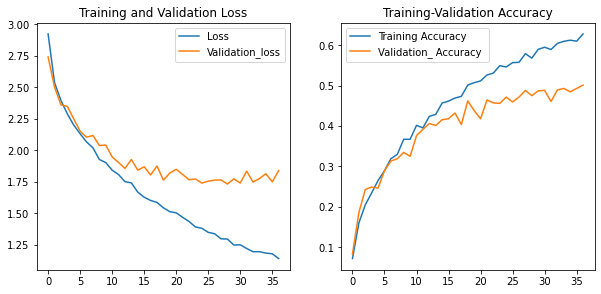

In [78]:
#saving the model history
loss = pd.DataFrame(model.history.history)


#plotting the loss and accuracy 
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(loss["loss"], label ="Loss")
plt.plot(loss["val_loss"], label = "Validation_loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(2,2,2)
plt.plot(loss['acc'],label = "Training Accuracy")
plt.plot(loss['val_acc'], label ="Validation_ Accuracy ")
plt.legend()
plt.title("Training-Validation Accuracy")

In [79]:
prediction = model.predict(X_val2)

# finding class with larget predicted probability using argmax of numpy 
y_pred = np.argmax(prediction, axis = 1)  # prediction using model 
y_val_orig = np.argmax(y_val, axis = 1) # original y_val
print(y_pred)

[20  9  0 17 18  3 14 16 18 20 16  9 16  3  9  6  0  3 11 11 11  3  0 15
 12  7  9  4 19  5  5 16  0 17 14 14 10  8  0  7  7 14 10  7 19 13  9 11
  5 16  3  7  8 12 14 17 19  9 11  9  3 14 11  8 15  0 11 20  0 10  9  2
  3 18  3 16  7 10  9 17 10 17  5 15 10 18  9 10 14 11  3 19 11 19  1  6
  3  7 11  9 14  3 16  0 20 19  3  9 19  4  9  9 20 10 16  3  3 18  5 10
 11 16 16 11 19  0 16  5  3 13 17 19 14 10 17  3 14  2  8  3  3  0  6 19
  3  3 16  3 17  5 10 10 18 10 10 17 20 12 18 19 18 11 20 10  9  7 20  8
  9  9 20  6  0 18  3  6  5 20 18 11 17 15 17  5 19 14 15 18  0  0  5 14
 16 14  3 12  3  2 19 14 17  9 20 14 12  5  4  3 12  3  2  9 12 10  9  1
 17 14  0 19 18  3 16 15 17  6 12 10  3 12 18  7 13  5 19  8 10 15  6 11
 16 10 14 17 18 13 14 19 15 17 15 12 18 14 14 10 20  3 19 16  5 14 19  0
  9 13  5 10 13 10 16  3 14 16  7  7 15  3  5  9 20 17 10 20  5  5 11  3
 16  5 18 11 10 13  0 16  0 16 14  9 14  9 16  6 15 17 14 16 11  4  8  5
  1  5 20  9  5 14  0 11 14 11 11  5  9 17 10 14  7

In [80]:
print(classification_report(y_val_orig, y_pred))

              precision    recall  f1-score   support

           0       0.16      0.13      0.14        45
           1       0.44      0.09      0.15        44
           2       0.21      0.07      0.11        40
           3       0.30      0.68      0.41        38
           4       0.39      0.17      0.23        42
           5       0.14      0.24      0.18        29
           6       0.28      0.14      0.18        37
           7       0.50      0.33      0.40        45
           8       0.24      0.21      0.23        28
           9       0.28      0.48      0.36        52
          10       0.23      0.38      0.28        37
          11       0.65      0.91      0.76        34
          12       1.00      0.70      0.82        33
          13       0.67      0.46      0.54        35
          14       0.55      0.82      0.66        49
          15       0.85      0.61      0.71        46
          16       0.85      0.76      0.80        54
          17       0.73    

# Experiment 4:

In [85]:
import tensorflow as tf

model_relu = Sequential()
model_relu.add(Conv2D(filters=16, kernel_size=2, input_shape=input_shape, activation='relu'))
model_relu.add(MaxPooling2D(pool_size=(2,2)))
model_relu.add(Dropout(0.2))

model_relu.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model_relu.add(MaxPooling2D(pool_size=(2,2)))
model_relu.add(Dropout(0.2))

model_relu.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model_relu.add(MaxPooling2D(pool_size=(2,2)))
model_relu.add(Dropout(0.2))

model_relu.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model_relu.add(MaxPooling2D(pool_size=(2,2)))
model_relu.add(Dropout(0.2))
model_relu.add(GlobalAveragePooling2D())
model_relu.add(Flatten())
model_relu.add(Dense(21, activation='softmax'))


model_relu.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy'],
)
model_relu.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 39, 173, 16)       80        
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 19, 86, 16)       0         
 g2D)                                                            
                                                                 
 dropout_29 (Dropout)        (None, 19, 86, 16)        0         
                                                                 
 conv2d_27 (Conv2D)          (None, 18, 85, 32)        2080      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 9, 42, 32)        0         
 g2D)                                                            
                                                                 
 dropout_30 (Dropout)        (None, 9, 42, 32)       

In [86]:
model_relu.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [87]:

es = EarlyStopping(monitor='val_loss', min_delta=0, patience=30, verbose=0, mode='auto',
    baseline=None, restore_best_weights=False)

checkpointer = ModelCheckpoint(filepath='weights6.best.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()


model_relu.fit(X_train2, y_train,
          batch_size = 100, 
          epochs = 300,
          validation_data = (X_val2, y_val), 
          callbacks=[checkpointer, es])

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/300
26/26 [==============================] - ETA: 0s - loss: 2.9813 - accuracy: 0.0611
Epoch 00001: val_loss improved from inf to 2.90763, saving model to weights6.best.hdf5
26/26 [==============================] - 8s 273ms/step - loss: 2.9813 - accuracy: 0.0611 - val_loss: 2.9076 - val_accuracy: 0.1357
Epoch 2/300
26/26 [==============================] - ETA: 0s - loss: 2.7527 - accuracy: 0.1190
Epoch 00002: val_loss improved from 2.90763 to 2.63735, saving model to weights6.best.hdf5
26/26 [==============================] - 7s 286ms/step - loss: 2.7527 - accuracy: 0.1190 - val_loss: 2.6374 - val_accuracy: 0.1321
Epoch 3/300
26/26 [==============================] - ETA: 0s - loss: 2.5491 - accuracy: 0.1643
Epoch 00003: val_loss improved from 2.63735 to 2.53595, saving model to weights6.best.hdf5
26/26 [==============================] - 6s 242ms/step - loss: 2.5491 - accuracy: 0.1643 - val_loss: 2.5359 - val_accuracy: 0.1738
Epoch 4/300
26/26 [==============================] - 

Epoch 28/300
26/26 [==============================] - ETA: 0s - loss: 1.8489 - accuracy: 0.4032
Epoch 00028: val_loss improved from 2.00403 to 1.99469, saving model to weights6.best.hdf5
26/26 [==============================] - 7s 277ms/step - loss: 1.8489 - accuracy: 0.4032 - val_loss: 1.9947 - val_accuracy: 0.3583
Epoch 29/300
26/26 [==============================] - ETA: 0s - loss: 1.8586 - accuracy: 0.3901
Epoch 00029: val_loss improved from 1.99469 to 1.98405, saving model to weights6.best.hdf5
26/26 [==============================] - 8s 296ms/step - loss: 1.8586 - accuracy: 0.3901 - val_loss: 1.9840 - val_accuracy: 0.3714
Epoch 30/300
26/26 [==============================] - ETA: 0s - loss: 1.8598 - accuracy: 0.3857
Epoch 00030: val_loss did not improve from 1.98405
26/26 [==============================] - 6s 236ms/step - loss: 1.8598 - accuracy: 0.3857 - val_loss: 2.0310 - val_accuracy: 0.3417
Epoch 31/300
26/26 [==============================] - ETA: 0s - loss: 1.8290 - accurac

Epoch 56/300
26/26 [==============================] - ETA: 0s - loss: 1.5474 - accuracy: 0.5032
Epoch 00056: val_loss did not improve from 1.83564
26/26 [==============================] - 6s 242ms/step - loss: 1.5474 - accuracy: 0.5032 - val_loss: 1.8514 - val_accuracy: 0.4381
Epoch 57/300
26/26 [==============================] - ETA: 0s - loss: 1.5261 - accuracy: 0.4996
Epoch 00057: val_loss did not improve from 1.83564
26/26 [==============================] - 6s 245ms/step - loss: 1.5261 - accuracy: 0.4996 - val_loss: 1.8557 - val_accuracy: 0.4250
Epoch 58/300
26/26 [==============================] - ETA: 0s - loss: 1.5252 - accuracy: 0.5103
Epoch 00058: val_loss did not improve from 1.83564
26/26 [==============================] - 6s 239ms/step - loss: 1.5252 - accuracy: 0.5103 - val_loss: 1.8497 - val_accuracy: 0.4238
Epoch 59/300
26/26 [==============================] - ETA: 0s - loss: 1.5168 - accuracy: 0.5095
Epoch 00059: val_loss did not improve from 1.83564
26/26 [============

Epoch 85/300
26/26 [==============================] - ETA: 0s - loss: 1.3050 - accuracy: 0.5738
Epoch 00085: val_loss did not improve from 1.78970
26/26 [==============================] - 6s 244ms/step - loss: 1.3050 - accuracy: 0.5738 - val_loss: 1.8050 - val_accuracy: 0.4690
Epoch 86/300
26/26 [==============================] - ETA: 0s - loss: 1.3180 - accuracy: 0.5706
Epoch 00086: val_loss did not improve from 1.78970
26/26 [==============================] - 7s 270ms/step - loss: 1.3180 - accuracy: 0.5706 - val_loss: 1.8410 - val_accuracy: 0.4595
Epoch 87/300
26/26 [==============================] - ETA: 0s - loss: 1.3062 - accuracy: 0.5806
Epoch 00087: val_loss did not improve from 1.78970
26/26 [==============================] - 8s 318ms/step - loss: 1.3062 - accuracy: 0.5806 - val_loss: 1.8233 - val_accuracy: 0.4619
Epoch 88/300
26/26 [==============================] - ETA: 0s - loss: 1.2981 - accuracy: 0.5770
Epoch 00088: val_loss did not improve from 1.78970
26/26 [============

Epoch 114/300
26/26 [==============================] - ETA: 0s - loss: 1.1673 - accuracy: 0.6167
Epoch 00114: val_loss did not improve from 1.78341
26/26 [==============================] - 7s 253ms/step - loss: 1.1673 - accuracy: 0.6167 - val_loss: 1.8342 - val_accuracy: 0.4655
Epoch 115/300
26/26 [==============================] - ETA: 0s - loss: 1.1571 - accuracy: 0.6222
Epoch 00115: val_loss did not improve from 1.78341
26/26 [==============================] - 9s 332ms/step - loss: 1.1571 - accuracy: 0.6222 - val_loss: 1.8118 - val_accuracy: 0.5095
Epoch 116/300
26/26 [==============================] - ETA: 0s - loss: 1.1972 - accuracy: 0.6187
Epoch 00116: val_loss improved from 1.78341 to 1.78217, saving model to weights6.best.hdf5
26/26 [==============================] - 8s 310ms/step - loss: 1.1972 - accuracy: 0.6187 - val_loss: 1.7822 - val_accuracy: 0.4964
Epoch 117/300
26/26 [==============================] - ETA: 0s - loss: 1.1340 - accuracy: 0.6298
Epoch 00117: val_loss did 

26/26 [==============================] - ETA: 0s - loss: 1.0638 - accuracy: 0.6456
Epoch 00143: val_loss did not improve from 1.78217
26/26 [==============================] - 7s 251ms/step - loss: 1.0638 - accuracy: 0.6456 - val_loss: 1.8913 - val_accuracy: 0.5012
Epoch 144/300
26/26 [==============================] - ETA: 0s - loss: 1.0210 - accuracy: 0.6647
Epoch 00144: val_loss did not improve from 1.78217
26/26 [==============================] - 7s 252ms/step - loss: 1.0210 - accuracy: 0.6647 - val_loss: 1.8895 - val_accuracy: 0.4988
Epoch 145/300
26/26 [==============================] - ETA: 0s - loss: 1.0347 - accuracy: 0.6540
Epoch 00145: val_loss did not improve from 1.78217
26/26 [==============================] - 7s 263ms/step - loss: 1.0347 - accuracy: 0.6540 - val_loss: 1.8848 - val_accuracy: 0.5131
Epoch 146/300
26/26 [==============================] - ETA: 0s - loss: 1.0426 - accuracy: 0.6548
Epoch 00146: val_loss did not improve from 1.78217
26/26 [======================

Text(0.5, 1.0, 'Training-Validation Accuracy')

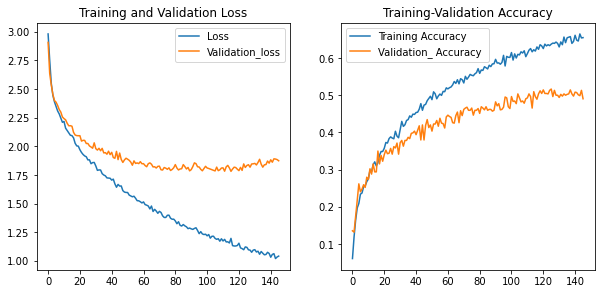

In [88]:
#saving the model history
loss = pd.DataFrame(model_relu.history.history)


#plotting the loss and accuracy 
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(loss["loss"], label ="Loss")
plt.plot(loss["val_loss"], label = "Validation_loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(2,2,2)
plt.plot(loss['accuracy'],label = "Training Accuracy")
plt.plot(loss['val_accuracy'], label ="Validation_ Accuracy ")
plt.legend()
plt.title("Training-Validation Accuracy")

In [89]:
prediction = model_relu.predict(X_val2)

# finding class with larget predicted probability using argmax of numpy 
y_pred = np.argmax(prediction, axis = 1)  # prediction using model 
y_val_orig = np.argmax(y_val, axis = 1) # original y_val
print(y_pred)

[20  5 11 17 18  3 11 16 15 20 18  1 16  3 10  6  0 18 20 11 11  2  0 18
 12  7  9  5 19  5  5 16  2 17 14 19 10  8  0  7  5 16 10  7 19 13  9 13
  5 16  3  8  6 14  0 17 19  8 18  1  3  7 11  8 15  0 11 12  5 10  5  1
  3 18  3 16  7  6  3 17 10 17  5 15 10 18  2 14 10 11  3 19 11 19  1 12
  8  9 11  4  6  6 16  3 20 19  3  9 19  4  5  8  7 10 16  3 15 18  5 10
 11 11 18 11 12 10 11 10  7 13 17 19 17 10 17 10 14  2  8  3  3 19  6 19
  3  3 18  0 17  5  5  8 18  5 10 17 20 12 18 19 18 16 20  5  3 17 20  8
  8  3 13 12  0 18  6  6  5 13 18 16  1 15 17  5 19 14 15 18  0  6  5 13
 11 14  3 12  3  2 19 13 17  2 20  2 12  5  6  3 12  8  2  0 12  0  9  1
 17 14 10 19 18  3 18 18 17  6 12 10  3 12 18  3 18  5 19  8  3 15  6 16
 16  1 17 17 15 13  3 19 18 17 16 12 18 17 14  1 13  6 19 16  5 19 19  2
  2 13  5  2 13 10 11  0  8 18 17  7 18  6  5  9 20  1  6 13  5 15 11  3
 16  5 18 11 17 20 19 16  2 16 14  8 16  1 16  0 15  4 14 16  1  8  5  0
  1  5 20  8  5 14  6 16 12 16 13  5  2 17  2 19  7

In [90]:
print(classification_report(y_val_orig, y_pred))

              precision    recall  f1-score   support

           0       0.10      0.04      0.06        45
           1       0.39      0.32      0.35        44
           2       0.32      0.33      0.32        40
           3       0.35      0.66      0.46        38
           4       0.33      0.07      0.12        42
           5       0.17      0.41      0.24        29
           6       0.30      0.22      0.25        37
           7       0.36      0.20      0.26        45
           8       0.12      0.21      0.15        28
           9       0.38      0.23      0.29        52
          10       0.28      0.30      0.29        37
          11       0.63      0.85      0.72        34
          12       0.91      0.88      0.89        33
          13       0.58      0.60      0.59        35
          14       0.69      0.55      0.61        49
          15       0.91      0.65      0.76        46
          16       0.80      0.67      0.73        54
          17       0.55    

# Experiment 5:

In [93]:
model_elu = Sequential()
model_elu.add(Conv2D(filters=16, kernel_size=2, input_shape=input_shape, activation='elu'))
model_elu.add(BatchNormalization())
model_elu.add(MaxPooling2D(pool_size=(2,2)))
model_elu.add(Dropout(0.2))


model_elu.add(Conv2D(filters=32, kernel_size=2, activation='elu'))
model_elu.add(BatchNormalization())
model_elu.add(MaxPooling2D(pool_size=(2,2)))
model_elu.add(Dropout(0.2))


model_elu.add(Conv2D(filters=64, kernel_size=2, activation='elu'))
model_elu.add(BatchNormalization())
model_elu.add(MaxPooling2D(pool_size=(2,2)))
model_elu.add(Dropout(0.2))


model_elu.add(Conv2D(filters=128, kernel_size=2, activation='elu'))
model_elu.add(MaxPooling2D(pool_size=(2,2)))
model_elu.add(Dropout(0.2))
model_elu.add(GlobalAveragePooling2D())
model_elu.add(Flatten())
model_elu.add(Dense(21, activation='softmax'))

model_elu.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model_elu.summary()


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 39, 173, 16)       80        
                                                                 
 batch_normalization_3 (Batc  (None, 39, 173, 16)      64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 19, 86, 16)       0         
 g2D)                                                            
                                                                 
 dropout_37 (Dropout)        (None, 19, 86, 16)        0         
                                                                 
 conv2d_35 (Conv2D)          (None, 18, 85, 32)        2080      
                                                                 
 batch_normalization_4 (Batc  (None, 18, 85, 32)     

In [94]:

es = EarlyStopping(monitor='val_loss', min_delta=0, patience=40, verbose=0, mode='auto',
    baseline=None, restore_best_weights=False)

checkpointer = ModelCheckpoint(filepath='weights7.best.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()


model_elu.fit(X_train2, y_train,
          batch_size = 100, 
          epochs = 300,
          validation_data = (X_val2, y_val), 
          callbacks=[checkpointer, es])

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/300
26/26 [==============================] - ETA: 0s - loss: 2.8670 - accuracy: 0.1448
Epoch 00001: val_loss improved from inf to 3.02174, saving model to weights7.best.hdf5
26/26 [==============================] - 12s 419ms/step - loss: 2.8670 - accuracy: 0.1448 - val_loss: 3.0217 - val_accuracy: 0.0548
Epoch 2/300
26/26 [==============================] - ETA: 0s - loss: 2.4333 - accuracy: 0.2230
Epoch 00002: val_loss did not improve from 3.02174
26/26 [==============================] - 10s 385ms/step - loss: 2.4333 - accuracy: 0.2230 - val_loss: 3.0632 - val_accuracy: 0.0405
Epoch 3/300
26/26 [==============================] - ETA: 0s - loss: 2.2859 - accuracy: 0.2710
Epoch 00003: val_loss did not improve from 3.02174
26/26 [==============================] - 10s 373ms/step - loss: 2.2859 - accuracy: 0.2710 - val_loss: 3.1531 - val_accuracy: 0.0405
Epoch 4/300
26/26 [==============================] - ETA: 0s - loss: 2.1761 - accuracy: 0.2952
Epoch 00004: val_loss did not impro

Epoch 30/300
26/26 [==============================] - ETA: 0s - loss: 1.4721 - accuracy: 0.5234
Epoch 00030: val_loss did not improve from 2.43085
26/26 [==============================] - 10s 378ms/step - loss: 1.4721 - accuracy: 0.5234 - val_loss: 2.7248 - val_accuracy: 0.3083
Epoch 31/300
26/26 [==============================] - ETA: 0s - loss: 1.4434 - accuracy: 0.5298
Epoch 00031: val_loss improved from 2.43085 to 2.34051, saving model to weights7.best.hdf5
26/26 [==============================] - 12s 457ms/step - loss: 1.4434 - accuracy: 0.5298 - val_loss: 2.3405 - val_accuracy: 0.3524
Epoch 32/300
26/26 [==============================] - ETA: 0s - loss: 1.4417 - accuracy: 0.5325
Epoch 00032: val_loss improved from 2.34051 to 1.99511, saving model to weights7.best.hdf5
26/26 [==============================] - 10s 375ms/step - loss: 1.4417 - accuracy: 0.5325 - val_loss: 1.9951 - val_accuracy: 0.4060
Epoch 33/300
26/26 [==============================] - ETA: 0s - loss: 1.4363 - accu

Epoch 59/300
26/26 [==============================] - ETA: 0s - loss: 1.1413 - accuracy: 0.6238
Epoch 00059: val_loss did not improve from 1.87253
26/26 [==============================] - 10s 397ms/step - loss: 1.1413 - accuracy: 0.6238 - val_loss: 1.9754 - val_accuracy: 0.4524
Epoch 60/300
26/26 [==============================] - ETA: 0s - loss: 1.1384 - accuracy: 0.6306
Epoch 00060: val_loss did not improve from 1.87253
26/26 [==============================] - 10s 403ms/step - loss: 1.1384 - accuracy: 0.6306 - val_loss: 1.9545 - val_accuracy: 0.4762
Epoch 61/300
26/26 [==============================] - ETA: 0s - loss: 1.1282 - accuracy: 0.6286
Epoch 00061: val_loss did not improve from 1.87253
26/26 [==============================] - 11s 409ms/step - loss: 1.1282 - accuracy: 0.6286 - val_loss: 2.0729 - val_accuracy: 0.4298
Epoch 62/300
26/26 [==============================] - ETA: 0s - loss: 1.1219 - accuracy: 0.6389
Epoch 00062: val_loss did not improve from 1.87253
26/26 [=========

Text(0.5, 1.0, 'Training-Validation Accuracy')

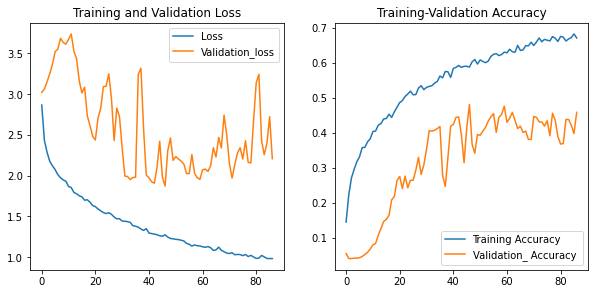

In [95]:
#saving the model history
loss = pd.DataFrame(model_elu.history.history)


#plotting the loss and accuracy 
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(loss["loss"], label ="Loss")
plt.plot(loss["val_loss"], label = "Validation_loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(2,2,2)
plt.plot(loss['accuracy'],label = "Training Accuracy")
plt.plot(loss['val_accuracy'], label ="Validation_ Accuracy ")
plt.legend()
plt.title("Training-Validation Accuracy")

# Experiment 6:

In [97]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())

model.add(Dense(21, activation='softmax')) 

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 39, 173, 16)       80        
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 19, 86, 16)       0         
 g2D)                                                            
                                                                 
 dropout_45 (Dropout)        (None, 19, 86, 16)        0         
                                                                 
 conv2d_43 (Conv2D)          (None, 18, 85, 32)        2080      
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 9, 42, 32)        0         
 g2D)                                                            
                                                                 
 dropout_46 (Dropout)        (None, 9, 42, 32)       

In [98]:
es = EarlyStopping(monitor='val_loss', min_delta=0, patience=40, verbose=0, mode='auto',
    baseline=None, restore_best_weights=False)

checkpointer = ModelCheckpoint(filepath='weights8.best.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()
model.fit(X_train2, y_train,
          batch_size = 150, 
          epochs = 300,
          validation_data = (X_val2, y_val), 
          callbacks=[checkpointer, es],verbose=1)
duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/300
17/17 [==============================] - ETA: 0s - loss: 3.0042 - accuracy: 0.0607
Epoch 00001: val_loss improved from inf to 2.97581, saving model to weights8.best.hdf5
17/17 [==============================] - 7s 360ms/step - loss: 3.0042 - accuracy: 0.0607 - val_loss: 2.9758 - val_accuracy: 0.0738
Epoch 2/300
17/17 [==============================] - ETA: 0s - loss: 2.9012 - accuracy: 0.0845
Epoch 00002: val_loss improved from 2.97581 to 2.86731, saving model to weights8.best.hdf5
17/17 [==============================] - 6s 332ms/step - loss: 2.9012 - accuracy: 0.0845 - val_loss: 2.8673 - val_accuracy: 0.1119
Epoch 3/300
17/17 [==============================] - ETA: 0s - loss: 2.7551 - accuracy: 0.1365
Epoch 00003: val_loss improved from 2.86731 to 2.69363, saving model to weights8.best.hdf5
17/17 [==============================] - 6s 335ms/step - loss: 2.7551 - accuracy: 0.1365 - val_loss: 2.6936 - val_accuracy: 0.1905
Epoch 4/300
17/17 [==============================] - 

17/17 [==============================] - ETA: 0s - loss: 1.9201 - accuracy: 0.3810
Epoch 00027: val_loss improved from 2.05805 to 2.05781, saving model to weights8.best.hdf5
17/17 [==============================] - 6s 362ms/step - loss: 1.9201 - accuracy: 0.3810 - val_loss: 2.0578 - val_accuracy: 0.3440
Epoch 28/300
17/17 [==============================] - ETA: 0s - loss: 1.8923 - accuracy: 0.3960
Epoch 00028: val_loss improved from 2.05781 to 2.05298, saving model to weights8.best.hdf5
17/17 [==============================] - 6s 355ms/step - loss: 1.8923 - accuracy: 0.3960 - val_loss: 2.0530 - val_accuracy: 0.3571
Epoch 29/300
17/17 [==============================] - ETA: 0s - loss: 1.8803 - accuracy: 0.3960
Epoch 00029: val_loss improved from 2.05298 to 2.03834, saving model to weights8.best.hdf5
17/17 [==============================] - 6s 357ms/step - loss: 1.8803 - accuracy: 0.3960 - val_loss: 2.0383 - val_accuracy: 0.3500
Epoch 30/300
17/17 [==============================] - ETA: 

Epoch 55/300
17/17 [==============================] - ETA: 0s - loss: 1.6218 - accuracy: 0.4849
Epoch 00055: val_loss did not improve from 1.90443
17/17 [==============================] - 6s 353ms/step - loss: 1.6218 - accuracy: 0.4849 - val_loss: 1.9096 - val_accuracy: 0.4048
Epoch 56/300
17/17 [==============================] - ETA: 0s - loss: 1.6207 - accuracy: 0.4790
Epoch 00056: val_loss improved from 1.90443 to 1.89592, saving model to weights8.best.hdf5
17/17 [==============================] - 6s 354ms/step - loss: 1.6207 - accuracy: 0.4790 - val_loss: 1.8959 - val_accuracy: 0.4060
Epoch 57/300
17/17 [==============================] - ETA: 0s - loss: 1.6006 - accuracy: 0.4790
Epoch 00057: val_loss improved from 1.89592 to 1.88487, saving model to weights8.best.hdf5
17/17 [==============================] - 6s 357ms/step - loss: 1.6006 - accuracy: 0.4790 - val_loss: 1.8849 - val_accuracy: 0.4143
Epoch 58/300
17/17 [==============================] - ETA: 0s - loss: 1.5926 - accurac

17/17 [==============================] - ETA: 0s - loss: 1.4146 - accuracy: 0.5361
Epoch 00083: val_loss did not improve from 1.84676
17/17 [==============================] - 6s 352ms/step - loss: 1.4146 - accuracy: 0.5361 - val_loss: 1.8719 - val_accuracy: 0.4464
Epoch 84/300
17/17 [==============================] - ETA: 0s - loss: 1.4121 - accuracy: 0.5421
Epoch 00084: val_loss improved from 1.84676 to 1.84091, saving model to weights8.best.hdf5
17/17 [==============================] - 6s 360ms/step - loss: 1.4121 - accuracy: 0.5421 - val_loss: 1.8409 - val_accuracy: 0.4583
Epoch 85/300
17/17 [==============================] - ETA: 0s - loss: 1.4075 - accuracy: 0.5484
Epoch 00085: val_loss did not improve from 1.84091
17/17 [==============================] - 6s 354ms/step - loss: 1.4075 - accuracy: 0.5484 - val_loss: 1.8577 - val_accuracy: 0.4548
Epoch 86/300
17/17 [==============================] - ETA: 0s - loss: 1.4147 - accuracy: 0.5365
Epoch 00086: val_loss did not improve from 

17/17 [==============================] - ETA: 0s - loss: 1.2714 - accuracy: 0.5730
Epoch 00112: val_loss did not improve from 1.84091
17/17 [==============================] - 6s 353ms/step - loss: 1.2714 - accuracy: 0.5730 - val_loss: 1.8525 - val_accuracy: 0.4679
Epoch 113/300
17/17 [==============================] - ETA: 0s - loss: 1.2520 - accuracy: 0.5968
Epoch 00113: val_loss did not improve from 1.84091
17/17 [==============================] - 6s 356ms/step - loss: 1.2520 - accuracy: 0.5968 - val_loss: 1.8544 - val_accuracy: 0.4750
Epoch 114/300
17/17 [==============================] - ETA: 0s - loss: 1.2471 - accuracy: 0.5889
Epoch 00114: val_loss did not improve from 1.84091
17/17 [==============================] - 6s 366ms/step - loss: 1.2471 - accuracy: 0.5889 - val_loss: 1.8522 - val_accuracy: 0.4786
Epoch 115/300
17/17 [==============================] - ETA: 0s - loss: 1.2409 - accuracy: 0.5925
Epoch 00115: val_loss did not improve from 1.84091
17/17 [======================

# Experiment 7:

In [234]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())

model.add(Dense(18, activation='softmax')) 

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_66 (Conv2D)          (None, 39, 173, 16)       80        
                                                                 
 max_pooling2d_63 (MaxPoolin  (None, 19, 86, 16)       0         
 g2D)                                                            
                                                                 
 dropout_69 (Dropout)        (None, 19, 86, 16)        0         
                                                                 
 conv2d_67 (Conv2D)          (None, 18, 85, 32)        2080      
                                                                 
 max_pooling2d_64 (MaxPoolin  (None, 9, 42, 32)        0         
 g2D)                                                            
                                                                 
 dropout_70 (Dropout)        (None, 9, 42, 32)       

In [235]:

es = EarlyStopping(monitor='val_loss', min_delta=0, patience=30, verbose=0, mode='auto',
    baseline=None, restore_best_weights=False)

checkpointer = ModelCheckpoint(filepath='weights12.best.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()


model.fit(X_train2, y_train,
          batch_size = 30, 
          epochs = 300,
          validation_data = (X_val2, y_val), 
          callbacks=[checkpointer, es],verbose=1)

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/300
43/44 [============================>.] - ETA: 0s - loss: 2.8160 - accuracy: 0.0643
Epoch 00001: val_loss improved from inf to 2.74821, saving model to weights12.best.hdf5
44/44 [==============================] - 5s 103ms/step - loss: 2.8165 - accuracy: 0.0640 - val_loss: 2.7482 - val_accuracy: 0.0856
Epoch 2/300
43/44 [============================>.] - ETA: 0s - loss: 2.5587 - accuracy: 0.1558
Epoch 00002: val_loss improved from 2.74821 to 2.43741, saving model to weights12.best.hdf5
44/44 [==============================] - 5s 118ms/step - loss: 2.5572 - accuracy: 0.1559 - val_loss: 2.4374 - val_accuracy: 0.1759
Epoch 3/300
43/44 [============================>.] - ETA: 0s - loss: 2.3216 - accuracy: 0.2047
Epoch 00003: val_loss improved from 2.43741 to 2.32249, saving model to weights12.best.hdf5
44/44 [==============================] - 4s 96ms/step - loss: 2.3215 - accuracy: 0.2045 - val_loss: 2.3225 - val_accuracy: 0.1921
Epoch 4/300
43/44 [============================>.] 

43/44 [============================>.] - ETA: 0s - loss: 1.5233 - accuracy: 0.4915
Epoch 00028: val_loss did not improve from 1.80773
44/44 [==============================] - 4s 85ms/step - loss: 1.5238 - accuracy: 0.4915 - val_loss: 1.8466 - val_accuracy: 0.4167
Epoch 29/300
43/44 [============================>.] - ETA: 0s - loss: 1.5004 - accuracy: 0.4969
Epoch 00029: val_loss did not improve from 1.80773
44/44 [==============================] - 4s 84ms/step - loss: 1.5005 - accuracy: 0.4961 - val_loss: 1.8105 - val_accuracy: 0.4398
Epoch 30/300
43/44 [============================>.] - ETA: 0s - loss: 1.4981 - accuracy: 0.5016 ETA
Epoch 00030: val_loss improved from 1.80773 to 1.78528, saving model to weights12.best.hdf5
44/44 [==============================] - 4s 99ms/step - loss: 1.4983 - accuracy: 0.5008 - val_loss: 1.7853 - val_accuracy: 0.4259
Epoch 31/300
43/44 [============================>.] - ETA: 0s - loss: 1.4578 - accuracy: 0.5147
Epoch 00031: val_loss did not improve fro

43/44 [============================>.] - ETA: 0s - loss: 1.0577 - accuracy: 0.6581
Epoch 00057: val_loss did not improve from 1.69835
44/44 [==============================] - 4s 85ms/step - loss: 1.0591 - accuracy: 0.6582 - val_loss: 1.7201 - val_accuracy: 0.5324
Epoch 58/300
43/44 [============================>.] - ETA: 0s - loss: 1.0504 - accuracy: 0.6519
Epoch 00058: val_loss did not improve from 1.69835
44/44 [==============================] - 4s 88ms/step - loss: 1.0489 - accuracy: 0.6528 - val_loss: 1.7442 - val_accuracy: 0.5301
Epoch 59/300
43/44 [============================>.] - ETA: 0s - loss: 1.0819 - accuracy: 0.6395
Epoch 00059: val_loss did not improve from 1.69835
44/44 [==============================] - 5s 104ms/step - loss: 1.0817 - accuracy: 0.6397 - val_loss: 1.7493 - val_accuracy: 0.4954
Epoch 60/300
43/44 [============================>.] - ETA: 0s - loss: 1.0704 - accuracy: 0.6395
Epoch 00060: val_loss did not improve from 1.69835
44/44 [===========================

# Experiment 8:

In [272]:
import tensorflow as tf

model_relu = Sequential()
model_relu.add(Conv2D(filters=16, kernel_size=2, input_shape=input_shape, activation='relu'))
model_relu.add(MaxPooling2D(pool_size=(2,2)))
model_relu.add(Dropout(0.2))

model_relu.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model_relu.add(MaxPooling2D(pool_size=(2,2)))
model_relu.add(Dropout(0.2))

model_relu.add(Conv2D(filters=256, kernel_size=2, activation='relu'))
model_relu.add(MaxPooling2D(pool_size=(2,2)))
model_relu.add(Dropout(0.2))

model_relu.add(Conv2D(filters=256, kernel_size=2, activation='relu'))
model_relu.add(MaxPooling2D(pool_size=(2,2)))
model_relu.add(Dropout(0.25))
model_relu.add(GlobalAveragePooling2D())
model_relu.add(Flatten())
model_relu.add(Dense(18, activation='softmax'))


model_relu.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy'],
)
model_relu.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_74 (Conv2D)          (None, 39, 173, 16)       80        
                                                                 
 max_pooling2d_71 (MaxPoolin  (None, 19, 86, 16)       0         
 g2D)                                                            
                                                                 
 dropout_77 (Dropout)        (None, 19, 86, 16)        0         
                                                                 
 conv2d_75 (Conv2D)          (None, 18, 85, 128)       8320      
                                                                 
 max_pooling2d_72 (MaxPoolin  (None, 9, 42, 128)       0         
 g2D)                                                            
                                                                 
 dropout_78 (Dropout)        (None, 9, 42, 128)      

In [273]:
model_relu.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [274]:

es = EarlyStopping(monitor='val_loss', min_delta=0, patience=40, verbose=0, mode='auto',
    baseline=None, restore_best_weights=False)

checkpointer = ModelCheckpoint(filepath='weights16.best.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()


model_relu.fit(X_train2, y_train,
          batch_size = 100, 
          epochs = 300,
          validation_data = (X_val2, y_val), 
          callbacks=[checkpointer, es])

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/300
64/64 [==============================] - ETA: 0s - loss: 2.3097 - accuracy: 0.2383
Epoch 00001: val_loss improved from inf to 2.04981, saving model to weights16.best.hdf5
64/64 [==============================] - 46s 698ms/step - loss: 2.3097 - accuracy: 0.2383 - val_loss: 2.0498 - val_accuracy: 0.3521
Epoch 2/300
64/64 [==============================] - ETA: 0s - loss: 1.8674 - accuracy: 0.3754
Epoch 00002: val_loss improved from 2.04981 to 1.80407, saving model to weights16.best.hdf5
64/64 [==============================] - 44s 691ms/step - loss: 1.8674 - accuracy: 0.3754 - val_loss: 1.8041 - val_accuracy: 0.4045
Epoch 3/300
64/64 [==============================] - ETA: 0s - loss: 1.6901 - accuracy: 0.4507
Epoch 00003: val_loss improved from 1.80407 to 1.65900, saving model to weights16.best.hdf5
64/64 [==============================] - 45s 698ms/step - loss: 1.6901 - accuracy: 0.4507 - val_loss: 1.6590 - val_accuracy: 0.4759
Epoch 4/300
64/64 [============================

64/64 [==============================] - ETA: 0s - loss: 0.6184 - accuracy: 0.7928
Epoch 00027: val_loss improved from 0.82773 to 0.81747, saving model to weights16.best.hdf5
64/64 [==============================] - 47s 735ms/step - loss: 0.6184 - accuracy: 0.7928 - val_loss: 0.8175 - val_accuracy: 0.7339
Epoch 28/300
64/64 [==============================] - ETA: 0s - loss: 0.6199 - accuracy: 0.7892
Epoch 00028: val_loss improved from 0.81747 to 0.79226, saving model to weights16.best.hdf5
64/64 [==============================] - 45s 709ms/step - loss: 0.6199 - accuracy: 0.7892 - val_loss: 0.7923 - val_accuracy: 0.7528
Epoch 29/300
64/64 [==============================] - ETA: 0s - loss: 0.5991 - accuracy: 0.7951
Epoch 00029: val_loss did not improve from 0.79226
64/64 [==============================] - 45s 710ms/step - loss: 0.5991 - accuracy: 0.7951 - val_loss: 0.8066 - val_accuracy: 0.7547
Epoch 30/300
64/64 [==============================] - ETA: 0s - loss: 0.5862 - accuracy: 0.803

Epoch 56/300
64/64 [==============================] - ETA: 0s - loss: 0.3712 - accuracy: 0.8688
Epoch 00056: val_loss did not improve from 0.72685
64/64 [==============================] - 53s 826ms/step - loss: 0.3712 - accuracy: 0.8688 - val_loss: 0.8192 - val_accuracy: 0.7755
Epoch 57/300
64/64 [==============================] - ETA: 0s - loss: 0.3627 - accuracy: 0.8715
Epoch 00057: val_loss did not improve from 0.72685
64/64 [==============================] - 51s 799ms/step - loss: 0.3627 - accuracy: 0.8715 - val_loss: 0.8397 - val_accuracy: 0.7798
Epoch 58/300
64/64 [==============================] - ETA: 0s - loss: 0.3663 - accuracy: 0.8710
Epoch 00058: val_loss did not improve from 0.72685
64/64 [==============================] - 52s 808ms/step - loss: 0.3663 - accuracy: 0.8710 - val_loss: 0.7738 - val_accuracy: 0.7793
Epoch 59/300
64/64 [==============================] - ETA: 0s - loss: 0.3696 - accuracy: 0.8661
Epoch 00059: val_loss did not improve from 0.72685
64/64 [=========

Text(0.5, 1.0, 'Training-Validation Accuracy')

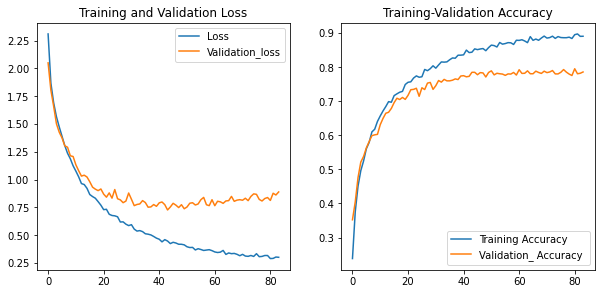

In [275]:
#saving the model history
loss = pd.DataFrame(model_relu.history.history)


#plotting the loss and accuracy 
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(loss["loss"], label ="Loss")
plt.plot(loss["val_loss"], label = "Validation_loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(2,2,2)
plt.plot(loss['accuracy'],label = "Training Accuracy")
plt.plot(loss['val_accuracy'], label ="Validation_ Accuracy ")
plt.legend()
plt.title("Training-Validation Accuracy")

In [276]:
prediction = model_relu.predict(X_val2)

# finding class with larget predicted probability using argmax of numpy 
y_pred = np.argmax(prediction, axis = 1)  # prediction using model 
y_val_orig = np.argmax(y_val, axis = 1) # original y_val
print(y_pred)

[13  0 11 ... 16 10 12]


In [277]:
print(classification_report(y_val_orig, y_pred))

              precision    recall  f1-score   support

           0       0.23      0.30      0.26        54
           1       0.10      0.05      0.06        41
           2       0.21      0.11      0.14        66
           3       0.27      0.37      0.31        27
           4       0.34      0.36      0.35        58
           5       0.17      0.06      0.09        35
           6       0.29      0.33      0.31        54
           7       0.07      0.16      0.10        19
           8       0.95      0.97      0.96       211
           9       0.92      0.94      0.93        95
          10       0.85      0.79      0.82       197
          11       0.92      0.83      0.87       211
          12       0.91      0.89      0.90       199
          13       0.93      0.95      0.94       208
          14       0.75      0.95      0.84        64
          15       0.89      0.95      0.92       210
          16       0.95      0.92      0.94       198
          17       0.75    

# Experiment 9:

In [278]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.5))
model.add(GlobalAveragePooling2D())

model.add(Dense(18, activation='softmax')) 

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_78 (Conv2D)          (None, 39, 173, 16)       80        
                                                                 
 max_pooling2d_75 (MaxPoolin  (None, 19, 86, 16)       0         
 g2D)                                                            
                                                                 
 dropout_81 (Dropout)        (None, 19, 86, 16)        0         
                                                                 
 conv2d_79 (Conv2D)          (None, 18, 85, 32)        2080      
                                                                 
 max_pooling2d_76 (MaxPoolin  (None, 9, 42, 32)        0         
 g2D)                                                            
                                                                 
 dropout_82 (Dropout)        (None, 9, 42, 32)       

In [279]:
es = EarlyStopping(monitor='val_loss', min_delta=0, patience=30, verbose=0, mode='auto',
    baseline=None, restore_best_weights=False)
checkpointer = ModelCheckpoint(filepath='weights17.best.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()
model.fit(X_train2, y_train,
          batch_size = 300, 
          epochs = 300,
          validation_data = (X_val2, y_val), 
          callbacks=[checkpointer, es],verbose=1)

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/300
22/22 [==============================] - ETA: 0s - loss: 2.6896 - accuracy: 0.1041
Epoch 00001: val_loss improved from inf to 2.52728, saving model to weights17.best.hdf5
22/22 [==============================] - 19s 668ms/step - loss: 2.6896 - accuracy: 0.1041 - val_loss: 2.5273 - val_accuracy: 0.1857
Epoch 2/300
22/22 [==============================] - ETA: 0s - loss: 2.4292 - accuracy: 0.1827
Epoch 00002: val_loss improved from 2.52728 to 2.31135, saving model to weights17.best.hdf5
22/22 [==============================] - 15s 660ms/step - loss: 2.4292 - accuracy: 0.1827 - val_loss: 2.3114 - val_accuracy: 0.2335
Epoch 3/300
22/22 [==============================] - ETA: 0s - loss: 2.2479 - accuracy: 0.2557
Epoch 00003: val_loss improved from 2.31135 to 2.16790, saving model to weights17.best.hdf5
22/22 [==============================] - 15s 672ms/step - loss: 2.2479 - accuracy: 0.2557 - val_loss: 2.1679 - val_accuracy: 0.2987
Epoch 4/300
22/22 [============================

22/22 [==============================] - ETA: 0s - loss: 1.3707 - accuracy: 0.5561
Epoch 00027: val_loss improved from 1.41864 to 1.39586, saving model to weights17.best.hdf5
22/22 [==============================] - 15s 675ms/step - loss: 1.3707 - accuracy: 0.5561 - val_loss: 1.3959 - val_accuracy: 0.5562
Epoch 28/300
22/22 [==============================] - ETA: 0s - loss: 1.3656 - accuracy: 0.5624
Epoch 00028: val_loss did not improve from 1.39586
22/22 [==============================] - 15s 683ms/step - loss: 1.3656 - accuracy: 0.5624 - val_loss: 1.4033 - val_accuracy: 0.5572
Epoch 29/300
22/22 [==============================] - ETA: 0s - loss: 1.3571 - accuracy: 0.5534
Epoch 00029: val_loss did not improve from 1.39586
22/22 [==============================] - 15s 686ms/step - loss: 1.3571 - accuracy: 0.5534 - val_loss: 1.4035 - val_accuracy: 0.5681
Epoch 30/300
22/22 [==============================] - ETA: 0s - loss: 1.3420 - accuracy: 0.5671
Epoch 00030: val_loss improved from 1.3

22/22 [==============================] - ETA: 0s - loss: 1.1137 - accuracy: 0.6399
Epoch 00054: val_loss improved from 1.12596 to 1.10542, saving model to weights17.best.hdf5
22/22 [==============================] - 15s 695ms/step - loss: 1.1137 - accuracy: 0.6399 - val_loss: 1.1054 - val_accuracy: 0.6531
Epoch 55/300
22/22 [==============================] - ETA: 0s - loss: 1.0789 - accuracy: 0.6514
Epoch 00055: val_loss improved from 1.10542 to 1.10397, saving model to weights17.best.hdf5
22/22 [==============================] - 15s 695ms/step - loss: 1.0789 - accuracy: 0.6514 - val_loss: 1.1040 - val_accuracy: 0.6474
Epoch 56/300
22/22 [==============================] - ETA: 0s - loss: 1.0867 - accuracy: 0.6449
Epoch 00056: val_loss improved from 1.10397 to 1.10173, saving model to weights17.best.hdf5
22/22 [==============================] - 16s 723ms/step - loss: 1.0867 - accuracy: 0.6449 - val_loss: 1.1017 - val_accuracy: 0.6498
Epoch 57/300
22/22 [==============================] -

22/22 [==============================] - ETA: 0s - loss: 0.9252 - accuracy: 0.6947
Epoch 00081: val_loss did not improve from 0.98292
22/22 [==============================] - 15s 681ms/step - loss: 0.9252 - accuracy: 0.6947 - val_loss: 0.9849 - val_accuracy: 0.6786
Epoch 82/300
22/22 [==============================] - ETA: 0s - loss: 0.9499 - accuracy: 0.6881
Epoch 00082: val_loss did not improve from 0.98292
22/22 [==============================] - 15s 677ms/step - loss: 0.9499 - accuracy: 0.6881 - val_loss: 0.9839 - val_accuracy: 0.6848
Epoch 83/300
22/22 [==============================] - ETA: 0s - loss: 0.9112 - accuracy: 0.7012
Epoch 00083: val_loss improved from 0.98292 to 0.97482, saving model to weights17.best.hdf5
22/22 [==============================] - 15s 684ms/step - loss: 0.9112 - accuracy: 0.7012 - val_loss: 0.9748 - val_accuracy: 0.6900
Epoch 84/300
22/22 [==============================] - ETA: 0s - loss: 0.9190 - accuracy: 0.6931
Epoch 00084: val_loss did not improve f

Epoch 109/300
22/22 [==============================] - ETA: 0s - loss: 0.8340 - accuracy: 0.7194
Epoch 00109: val_loss improved from 0.89142 to 0.88746, saving model to weights17.best.hdf5
22/22 [==============================] - 15s 675ms/step - loss: 0.8340 - accuracy: 0.7194 - val_loss: 0.8875 - val_accuracy: 0.7160
Epoch 110/300
22/22 [==============================] - ETA: 0s - loss: 0.8145 - accuracy: 0.7227
Epoch 00110: val_loss did not improve from 0.88746
22/22 [==============================] - 15s 673ms/step - loss: 0.8145 - accuracy: 0.7227 - val_loss: 0.8883 - val_accuracy: 0.7174
Epoch 111/300
22/22 [==============================] - ETA: 0s - loss: 0.8204 - accuracy: 0.7264
Epoch 00111: val_loss improved from 0.88746 to 0.87050, saving model to weights17.best.hdf5
22/22 [==============================] - 15s 688ms/step - loss: 0.8204 - accuracy: 0.7264 - val_loss: 0.8705 - val_accuracy: 0.7245
Epoch 112/300
22/22 [==============================] - ETA: 0s - loss: 0.8134 

Epoch 137/300
22/22 [==============================] - ETA: 0s - loss: 0.7671 - accuracy: 0.7431
Epoch 00137: val_loss improved from 0.83122 to 0.83087, saving model to weights17.best.hdf5
22/22 [==============================] - 15s 675ms/step - loss: 0.7671 - accuracy: 0.7431 - val_loss: 0.8309 - val_accuracy: 0.7410
Epoch 138/300
22/22 [==============================] - ETA: 0s - loss: 0.7519 - accuracy: 0.7429
Epoch 00138: val_loss did not improve from 0.83087
22/22 [==============================] - 15s 672ms/step - loss: 0.7519 - accuracy: 0.7429 - val_loss: 0.8417 - val_accuracy: 0.7372
Epoch 139/300
22/22 [==============================] - ETA: 0s - loss: 0.7589 - accuracy: 0.7398
Epoch 00139: val_loss did not improve from 0.83087
22/22 [==============================] - 15s 681ms/step - loss: 0.7589 - accuracy: 0.7398 - val_loss: 0.8382 - val_accuracy: 0.7391
Epoch 140/300
22/22 [==============================] - ETA: 0s - loss: 0.7328 - accuracy: 0.7481
Epoch 00140: val_loss 

Epoch 166/300
22/22 [==============================] - ETA: 0s - loss: 0.7086 - accuracy: 0.7583
Epoch 00166: val_loss did not improve from 0.79531
22/22 [==============================] - 15s 680ms/step - loss: 0.7086 - accuracy: 0.7583 - val_loss: 0.8113 - val_accuracy: 0.7462
Epoch 167/300
22/22 [==============================] - ETA: 0s - loss: 0.7050 - accuracy: 0.7631
Epoch 00167: val_loss did not improve from 0.79531
22/22 [==============================] - 15s 683ms/step - loss: 0.7050 - accuracy: 0.7631 - val_loss: 0.8035 - val_accuracy: 0.7448
Epoch 168/300
22/22 [==============================] - ETA: 0s - loss: 0.6888 - accuracy: 0.7650
Epoch 00168: val_loss did not improve from 0.79531
22/22 [==============================] - 15s 679ms/step - loss: 0.6888 - accuracy: 0.7650 - val_loss: 0.8072 - val_accuracy: 0.7462
Epoch 169/300
22/22 [==============================] - ETA: 0s - loss: 0.6880 - accuracy: 0.7706
Epoch 00169: val_loss improved from 0.79531 to 0.79283, saving 

22/22 [==============================] - ETA: 0s - loss: 0.6567 - accuracy: 0.7744
Epoch 00194: val_loss improved from 0.76708 to 0.76277, saving model to weights17.best.hdf5
22/22 [==============================] - 15s 696ms/step - loss: 0.6567 - accuracy: 0.7744 - val_loss: 0.7628 - val_accuracy: 0.7595
Epoch 195/300
22/22 [==============================] - ETA: 0s - loss: 0.6513 - accuracy: 0.7710
Epoch 00195: val_loss did not improve from 0.76277
22/22 [==============================] - 15s 700ms/step - loss: 0.6513 - accuracy: 0.7710 - val_loss: 0.7867 - val_accuracy: 0.7552
Epoch 196/300
22/22 [==============================] - ETA: 0s - loss: 0.6430 - accuracy: 0.7791
Epoch 00196: val_loss did not improve from 0.76277
22/22 [==============================] - 15s 697ms/step - loss: 0.6430 - accuracy: 0.7791 - val_loss: 0.7748 - val_accuracy: 0.7590
Epoch 197/300
22/22 [==============================] - ETA: 0s - loss: 0.6480 - accuracy: 0.7776
Epoch 00197: val_loss did not improv

Epoch 223/300
22/22 [==============================] - ETA: 0s - loss: 0.6135 - accuracy: 0.7845
Epoch 00223: val_loss did not improve from 0.74391
22/22 [==============================] - 16s 713ms/step - loss: 0.6135 - accuracy: 0.7845 - val_loss: 0.7593 - val_accuracy: 0.7590
Epoch 224/300
22/22 [==============================] - ETA: 0s - loss: 0.6184 - accuracy: 0.7840
Epoch 00224: val_loss improved from 0.74391 to 0.74144, saving model to weights17.best.hdf5
22/22 [==============================] - 16s 712ms/step - loss: 0.6184 - accuracy: 0.7840 - val_loss: 0.7414 - val_accuracy: 0.7713
Epoch 225/300
22/22 [==============================] - ETA: 0s - loss: 0.6170 - accuracy: 0.7894
Epoch 00225: val_loss did not improve from 0.74144
22/22 [==============================] - 16s 711ms/step - loss: 0.6170 - accuracy: 0.7894 - val_loss: 0.7478 - val_accuracy: 0.7670
Epoch 226/300
22/22 [==============================] - ETA: 0s - loss: 0.6155 - accuracy: 0.7895
Epoch 00226: val_loss 

Epoch 252/300
22/22 [==============================] - ETA: 0s - loss: 0.5949 - accuracy: 0.7888
Epoch 00252: val_loss did not improve from 0.72984
22/22 [==============================] - 20s 907ms/step - loss: 0.5949 - accuracy: 0.7888 - val_loss: 0.7340 - val_accuracy: 0.7647
Epoch 253/300
22/22 [==============================] - ETA: 0s - loss: 0.5843 - accuracy: 0.8003
Epoch 00253: val_loss did not improve from 0.72984
22/22 [==============================] - 16s 707ms/step - loss: 0.5843 - accuracy: 0.8003 - val_loss: 0.7369 - val_accuracy: 0.7684
Epoch 254/300
22/22 [==============================] - ETA: 0s - loss: 0.5778 - accuracy: 0.7977
Epoch 00254: val_loss improved from 0.72984 to 0.72878, saving model to weights17.best.hdf5
22/22 [==============================] - 16s 720ms/step - loss: 0.5778 - accuracy: 0.7977 - val_loss: 0.7288 - val_accuracy: 0.7732
Epoch 255/300
22/22 [==============================] - ETA: 0s - loss: 0.5898 - accuracy: 0.7951
Epoch 00255: val_loss 

Epoch 281/300
22/22 [==============================] - ETA: 0s - loss: 0.5488 - accuracy: 0.8140
Epoch 00281: val_loss improved from 0.72827 to 0.72367, saving model to weights17.best.hdf5
22/22 [==============================] - 17s 759ms/step - loss: 0.5488 - accuracy: 0.8140 - val_loss: 0.7237 - val_accuracy: 0.7765
Epoch 282/300
22/22 [==============================] - ETA: 0s - loss: 0.5662 - accuracy: 0.8037
Epoch 00282: val_loss did not improve from 0.72367
22/22 [==============================] - 17s 761ms/step - loss: 0.5662 - accuracy: 0.8037 - val_loss: 0.7361 - val_accuracy: 0.7755
Epoch 283/300
22/22 [==============================] - ETA: 0s - loss: 0.5717 - accuracy: 0.8061
Epoch 00283: val_loss did not improve from 0.72367
22/22 [==============================] - 16s 741ms/step - loss: 0.5717 - accuracy: 0.8061 - val_loss: 0.7312 - val_accuracy: 0.7774
Epoch 284/300
22/22 [==============================] - ETA: 0s - loss: 0.5572 - accuracy: 0.8072
Epoch 00284: val_loss 